# Romberg

$$
I=\int_0^1 \sin^2(100x)
$$

Comparemos nuestros métodos contra Romberg

In [2]:
from numpy import *

def trapecio(f,a,b,N):
    h=(b-a)/N
    s=0  #s=0.5*f(a)+0.5*f(b) metemos esto en el for
    for k in range(1,N//2+1):
        s+=f(a+(2*k-1)*h)
    return s*h

def simpson(f, a, b, n):
    h=(b-a)/n
    s=0.0
    x=a + h
    for i in range(1,n,2):
        s += 4*f(x)
        x += 2*h

    x = a + 2*h
    for i in range(2,n,2):
        s += 2*f(x)
        x += 2*h
    return (h/3)*(f(a)+f(b)+s)


def Romberg(f,a,b,epsilon=1e-6):
    I = (b-a)/2*(f(b)+f(a)) #primer termino es trapecio
    eps=1
    N=1
    R =zeros((100,100)) 
    R[0,0]=I
    i=0
    while eps>epsilon:
        N*=2
        i+=1
        R[i,0] = R[i-1,0]/2 + trapecio(f,a,b,N)
        for m in range(i):
            R[i,m+1] =R[i,m] + 1/(4**(m+1)-1)*(R[i,m] - R[i-1,m])
            eps = abs(R[i,m+1]-R[i-1,m])
    I= R[i,m+1]
    return I

f=lambda x: sin(sqrt(100*x))**2



print(trapecio(f,0,1.0,2000)) #Horrible
print(simpson(f,0,1.0,200))
print(Romberg(f,0,1.0,1e-16))

0.2279182542270841
0.45583160645166554
0.45583253230908477


In [3]:
# Integración Cuadratura Gaussiana

In [2]:
from numpy import ones,copy,cos,tan,pi,linspace

def gaussxw(N):

    #Aproximación inicial de las raíces de los polinomios de Legendre
    a = linspace(3,4*N-1,N)/(4*N+2)
    x = cos(pi*a+1/(8*N*N*tan(a)))

        # Encontramos ceros de Legendre con Newton-Raphson
    epsilon = 1e-15
    delta = 1.0
    while delta>epsilon:
        p0 = ones(N,float)
        p1 = copy(x)
        for k in range(1,N):
            p0,p1 = p1,((2*k+1)*x*p1-k*p0)/(k+1)
        dp = (N+1)*(p0-x*p1)/(1-x*x)
        dx = p1/dp
        x -= dx
        delta = max(abs(dx))

    # Calculando los pesos
    w = 2*(N+1)*(N+1)/(N*N*(1-x*x)*dp*dp)
    return x,w

def gaussxwab(N,a,b):
    x,w = gaussxw(N)
    return 0.5*(b-a)*x+0.5*(b+a),0.5*(b-a)*w

In [3]:
def f(x):
    return x**4 - 2*x + 1

N = 3
a = 0.0
b = 2.0

x,w = gaussxw(N)
xp = 0.5*(b-a)*x + 0.5*(b+a)
wp = 0.5*(b-a)*w

# Hacemos la integral
s = 0.0
for k in range(N):
    s += wp[k]*f(xp[k])

print(s)

4.4000000000000075


### Ejercicio: Capacidad calorífica de un Sólido

La teoría de Debye de solidos dice que la capacidad calorífica de un sólido a temperatura T es:
    $$C_v=9V \rho k_B\left( \frac{T}{\theta_D} \right)^3 \int_0^{\theta_D/T} \frac{x^4e^x}{(e^x-1)^2}dx$$
donde $V$ es el volumen del sólido, $\rho$ es la densidad numérica de lo átomos, $k_B$ es la constante de Boltzmann, y $\theta_D$ es la temperatura de Debye, una propiedad de los sólidos que solo depende de la densidad y la velocidad del sonido.

Escribamos una función $c_V(T)$ que calcule la capacidad calorífica de una temperatura dada, para una muestra de aluminio de 100 cm$^3$ con $\rho$ = 6.022 $\times$ 10$^{28}$ m$^{-3}$ y $\theta_D$=428 K. Usa cuadratura gaussiana para evaluar la integral con $N=50$. Luego grafica tu función $c_V(T)$ para un rango de temperatura de T=5 K a T= 500 K


25.975350196900344


C:\Users\arman\anaconda3\lib\site-packages\ipykernel_launcher.py:10: RuntimeWarning: overflow encountered in double_scalars
  # Remove the CWD from sys.path while we load stuff.


ValueError: x and y must have same first dimension, but have shapes (4950,) and (1,)

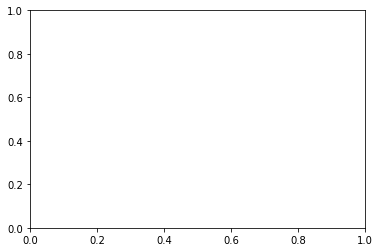

In [56]:
import numpy as np
V=1e-4 #[m*3]
ro=6.022e28 #[1/m*3]
TD=428.0 #[K]
kB=1.3806488e-23


#Primero calculo la integral
def g(x):
    return ((x**4 * np.exp(x))/(np.exp(x)-1)**2)


N = 50
a = 0.0
#T = linspace()
b = TD #/T

x,w = gaussxw(N)
xp = 0.5*(b-a)*x + 0.5*(b+a)
wp = 0.5*(b-a)*w

# Hacemos la integral
s = 0.0
for k in range(N):
    s += wp[k]*g(xp[k])

print(s)


#Ahora hay que graficar la funcion
def cv(T):
    for k in range(5,500,0.1):
        cv=[]
        cvnueva = cv.append(9*V*ro*kB(T[k]/TD)**3)*s
        return cv

from pylab import *
T=arange(5,500,0.1)
plot(T,cv)
#xlabel('abscisas')
#ylabel('ordenadas')
#title('Gráfica')
#grid(True)



